In [1]:
#Importando bibliotecas (pandas - Manipulação e análise de dados tabulares e numpy - Operações matematicas)

import pandas as pd
import numpy as np

PrestacoesConta = [[1., 'local', 12, 10, 2300, 1],
                   [2., 'local', 1, 4, 83, 1],
                   [3., 'longa', 2, 22, 300.10, 2],
                   [4., 'local', 5, 1, 412, 1]]

tabelaConta = pd.DataFrame(data=PrestacoesConta, columns=["amostra", "tipo", "duracao", "frequencia", "valor", "transporte"])

In [2]:
tabelaConta

,amostra,tipo,duracao,frequencia,valor,transporte
0,1.0,local,12,10,2300.0,1
1,2.0,local,1,4,83.0,1
2,3.0,longa,2,22,300.1,2
3,4.0,local,5,1,412.0,1


In [3]:
tabelaConta ['tipo'] = tabelaConta ['tipo'].astype('category')
cat_col = tabelaConta.select_dtypes(['category']).columns

tabelaConta[cat_col] = tabelaConta[cat_col].apply(lambda x:x.cat.codes)

In [4]:
tabelaConta

,amostra,tipo,duracao,frequencia,valor,transporte
0,1.0,0,12,10,2300.0,1
1,2.0,0,1,4,83.0,1
2,3.0,1,2,22,300.1,2
3,4.0,0,5,1,412.0,1


In [5]:
tabelaConta = tabelaConta.loc[:, 'tipo':]

In [6]:
tabelaConta

,tipo,duracao,frequencia,valor,transporte
0,0,12,10,2300.0,1
1,0,1,4,83.0,1
2,1,2,22,300.1,2
3,0,5,1,412.0,1


In [7]:
from sklearn.preprocessing import StandardScaler
escala = StandardScaler()
escala.fit(tabelaConta)
x_norm = escala.transform(tabelaConta)

In [10]:
x_norm

array([[-0.57735027,  1.62746694,  0.09325048,  1.71665332, -0.57735027],
       [-0.57735027, -0.92998111, -0.65275337, -0.77696355, -0.57735027],
       [ 1.73205081, -0.69748583,  1.58525817, -0.53277581,  1.73205081],
       [-0.57735027,  0.        , -1.02575529, -0.40691396, -0.57735027]])

In [12]:
ResulPrestacoes = [[1, 0, 1, 1]]
Resultado = pd.DataFrame(data=ResulPrestacoes)
Resultado = Resultado.T

In [14]:
Resultado

,0
0,1
1,0
2,1
3,1


In [15]:
from sklearn.neural_network import MLPRegressor

rna = MLPRegressor(hidden_layer_sizes=(5,3),
	max_iter=2000,
	tol=0.00001,
	learning_rate_init=0.1,
	solver='sgd',
	activation='logistic',
	learning_rate='constant',
	verbose=0,)
rna.fit(x_norm, Resultado)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(5, 3),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-05,
             verbose=0)

In [17]:
y_rna_previsao = rna.predict(x_norm)
y_rna_previsao

array([1.07437322, 0.01997784, 0.98334902, 0.92370441])

In [18]:
xFut= np.array([[0, 1, 4, 83.0, 1]])
xFutnorm = escala.transform(xFut)
yFut=rna.predict(xFutnorm)
yFut

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.01997784])

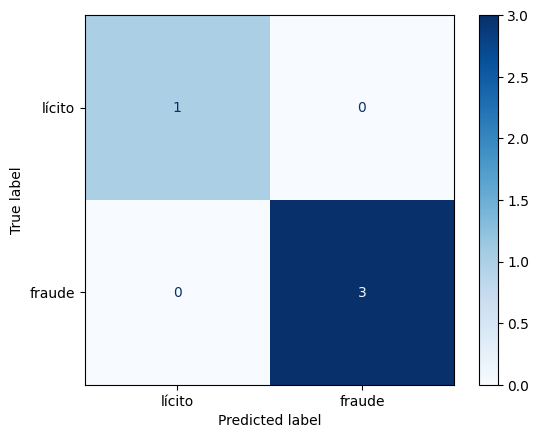

In [20]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Títulos das classes
titulos = ['lícito', 'fraude']

# Get predictions from the regressor
y_pred = rna.predict(x_norm)

# Convert predictions to binary classes using a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Exibir matriz de confusão
ConfusionMatrixDisplay.from_predictions(
    Resultado,          # rótulos verdadeiros
    y_pred_binary,      # rótulos previstos
    display_labels=titulos,
    cmap=plt.cm.Blues,
    normalize=None
)

plt.show()